## (1) Packages and settings

In [1]:
import sys, os, math
import numpy as np

In [2]:
# plot formatting 
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)

rcnew = {"mathtext.fontset" : "cm", 
         "xtick.labelsize" : 18,
         "ytick.labelsize" : 18,
         "axes.titlesize" : 26, 
         "axes.labelsize" : 22,
         "xtick.major.size" : 8,      
         "xtick.minor.size" : 4,      
         "ytick.major.size" : 8,      
         "ytick.minor.size" : 4,      
         "legend.fontsize" : 22,
         'figure.titlesize' : 30,
         'errorbar.capsize' : 4,
         'axes.xmargin': 0.05,
          'axes.ymargin': 0.05,
        }
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
  "text.usetex": True,
})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
from getdist import plots, MCSamples
import getdist

## (2) Plot the samples

Removed no burn in
Fisher Forecast on LN fields: 
 Expected error on Omega_M: 0.01935 
 Expected error on sigma_8: 0.01297 

Removed no burn in
Fisher Forecast on VICReg summaries: 
 Expected error on Omega_M: 0.02009 
 Expected error on sigma_8: 0.01322 



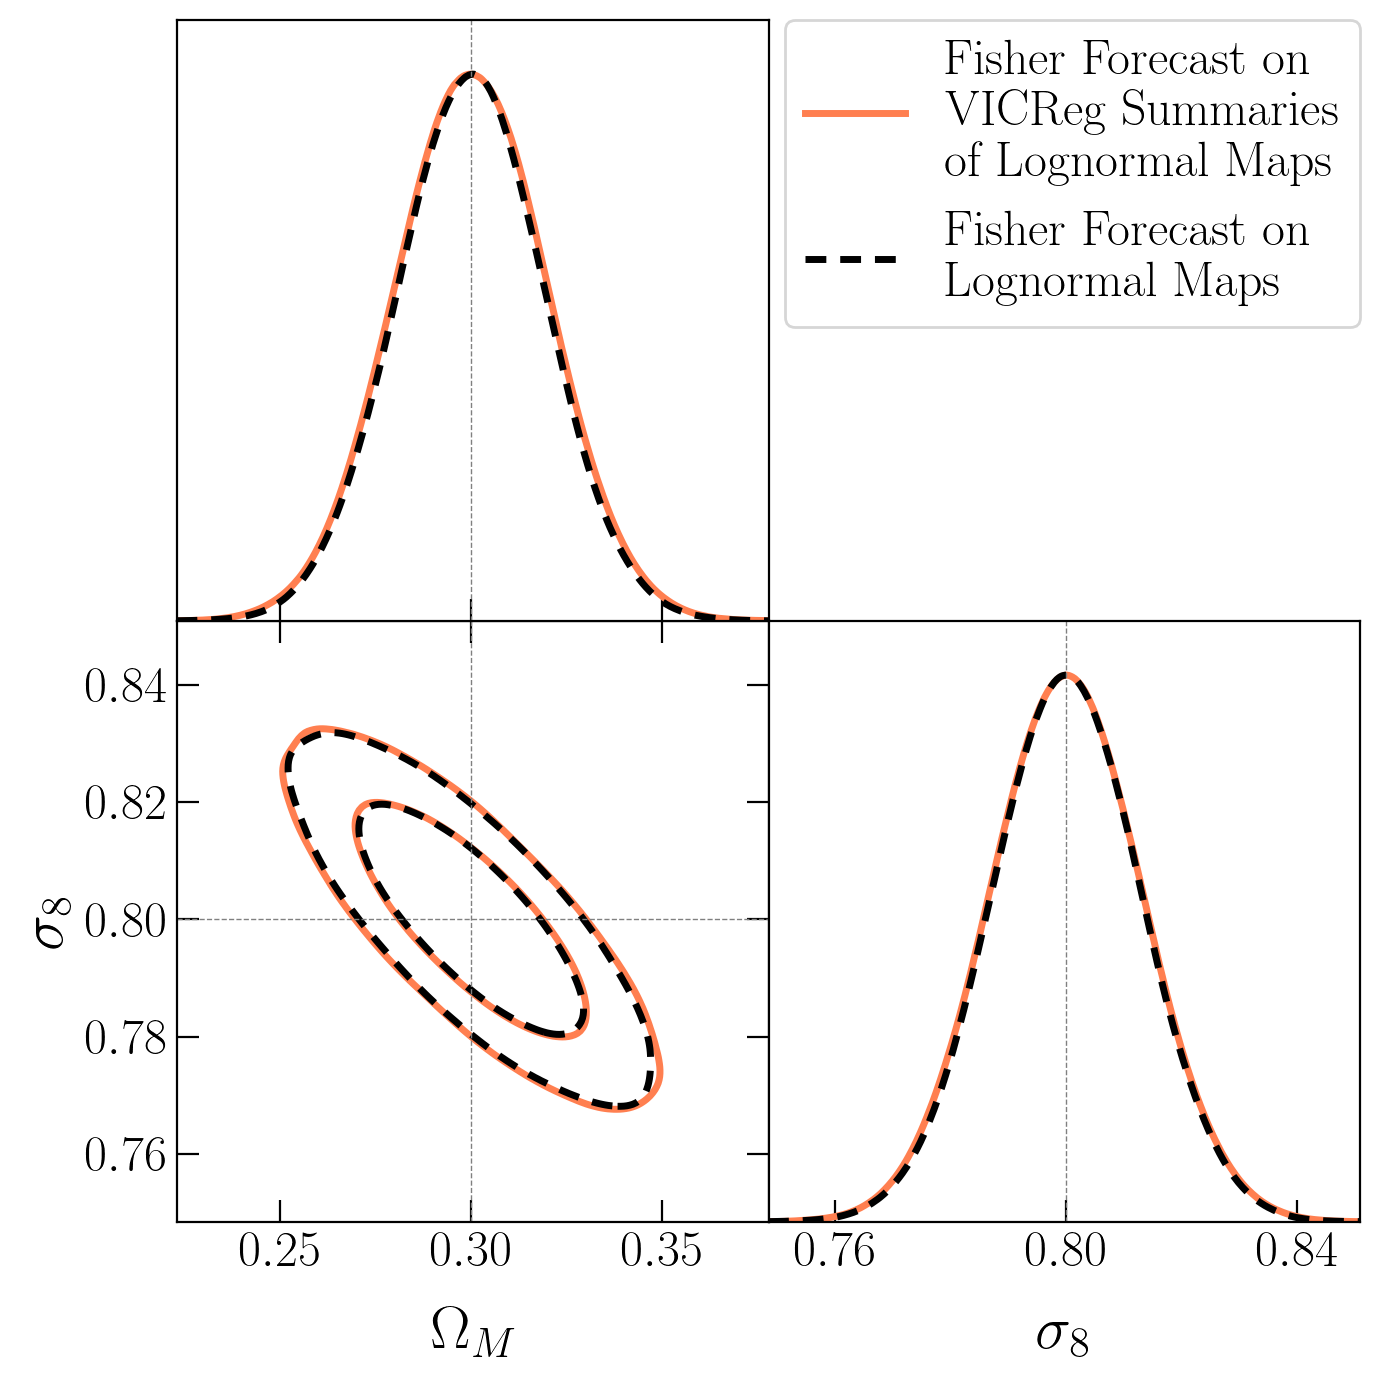

In [4]:
%matplotlib inline

# Plot samples from the Fisher Forecast computed on the maps
names = ['OmegaM', 'sigma8']
labels =  ['\Omega_M', '\sigma_8']
params = np.array([0.3, 0.8]) 
#######################################################
# computed for lognormal fields
cov_fisher = np.array([[ 0.00037432, -0.00019764],
                       [-0.00019764, 0.00016834]])
samples_fisher = np.random.multivariate_normal(params, cov_fisher, size=100000)
samples_fisher = MCSamples(samples=samples_fisher,
                           names = names, 
                           labels = labels, 
                           label='Fisher Forecast on \n Lognormal Maps')
print('Fisher Forecast on LN fields: \n Expected error on Omega_M: {:.5f} \n Expected error on sigma_8: {:.5f} \n'.format(np.sqrt(cov_fisher[0, 0]),
                                                                                 np.sqrt(cov_fisher[1, 1]))) 
#######################################################
# Plot samples from the Fisher Forecast computed on the summaries
# computed for VICReg summaries
cov_V_fisher = np.array([[ 0.00040355, -0.00020882],
                         [-0.00020882,  0.00017478]])
samples_V_fisher = np.random.multivariate_normal(params, cov_V_fisher, size=100000)
samples_V_fisher = MCSamples(samples=samples_V_fisher,
                             names = names, labels = labels, 
                             label='Fisher Forecast on \n VICReg Summaries \n of Lognormal Maps')

print('Fisher Forecast on VICReg summaries: \n Expected error on Omega_M: {:.5f} \n Expected error on sigma_8: {:.5f} \n'.format(np.sqrt(cov_V_fisher[0, 0]),
                                                                                 np.sqrt(cov_V_fisher[1, 1]))) 

### Triangle plot
g = plots.get_subplot_plotter(3.5)
g.settings.rc_sizes(legend_fontsize=18)
g.triangle_plot([samples_V_fisher, samples_fisher, ],
                filled=False,
                markers={'OmegaM':params[0], 'sigma8':params[1]},
                contour_colors=[ 'coral', 'k',], #377eb8'], 
                contour_ls=['-', '--'],
                contour_lws=2.5,legend_fontsize =40
               )

